# Traffic Sign Recognition


In [ ]:
!git clone https://github.com/pradeepreddyvv/Smart-Driving-Assistance.git

Cloning into 'traffic-signs-tensorflow'...
remote: Enumerating objects: 18, done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 18
Unpacking objects: 100% (18/18), done.


In [ ]:
!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip

--2022-09-02 04:23:32--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.168, 2001:67c:10ec:36c2::168
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174298785 (166M) [application/zip]
Saving to: ‘BelgiumTSC_Training.zip’

BelgiumTSC_Training 100%[===================>] 166.22M  5.96MB/s    in 28s     

2022-09-02 04:24:01 (5.87 MB/s) - ‘BelgiumTSC_Training.zip’ saved [174298785/174298785]



In [ ]:
!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip

--2022-09-02 04:46:15--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.168, 2001:67c:10ec:36c2::168
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77877833 (74M) [application/zip]
Saving to: ‘BelgiumTSC_Testing.zip.1’

BelgiumTSC_Testing. 100%[===================>]  74.27M  5.94MB/s    in 13s     

2022-09-02 04:46:28 (5.85 MB/s) - ‘BelgiumTSC_Testing.zip.1’ saved [77877833/77877833]



In [ ]:
!unzip /content/BelgiumTSC_Testing.zip
!unzip /content/BelgiumTSC_Training.zip

Archive:  /content/BelgiumTSC_Testing.zip
   creating: Testing/
   creating: Testing/00000/
  inflating: Testing/00000/00017_00000.ppm  
  inflating: Testing/00000/00017_00001.ppm  
  inflating: Testing/00000/00017_00002.ppm  
  inflating: Testing/00000/00021_00000.ppm  
  inflating: Testing/00000/00021_00001.ppm  
  inflating: Testing/00000/00021_00002.ppm  
  inflating: Testing/00000/GT-00000.csv  
   creating: Testing/00001/
  inflating: Testing/00001/00252_00000.ppm  
  inflating: Testing/00001/00252_00001.ppm  
  inflating: Testing/00001/00252_00002.ppm  
  inflating: Testing/00001/00398_00000.ppm  
  inflating: Testing/00001/00398_00001.ppm  
  inflating: Testing/00001/00398_00002.ppm  
  inflating: Testing/00001/00414_00000.ppm  
  inflating: Testing/00001/00414_00001.ppm  
  inflating: Testing/00001/00414_00002.ppm  
  inflating: Testing/00001/00424_00000.ppm  
  inflating: Testing/00001/00424_00001.ppm  
  inflating: Testing/00001/00424_00002.ppm  
  inflating: Testing/00001/0

In [ ]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline

In [ ]:
import skimage.io
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            # images.append(skimage.data.imread(f))
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels


ROOT_PATH = "/content/"
train_data_dir = os.path.join(ROOT_PATH, "/content/Training")
test_data_dir = os.path.join(ROOT_PATH, "/content/Testing")

images, labels = load_data(train_data_dir)

In [ ]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4575


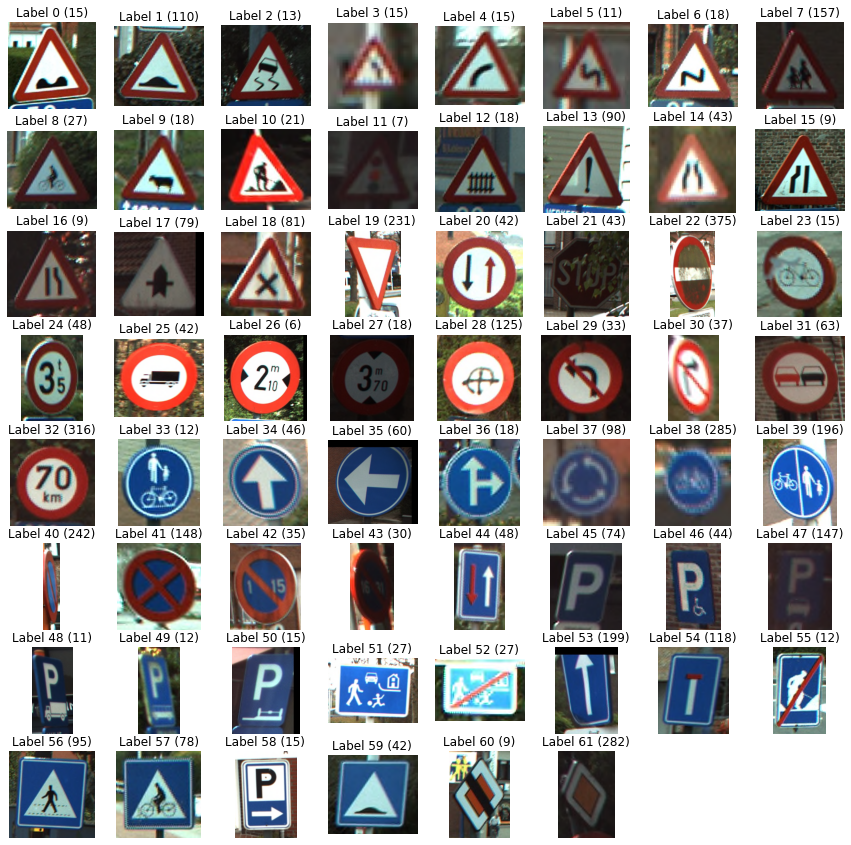

In [ ]:
# This will Display the first image of each label.
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

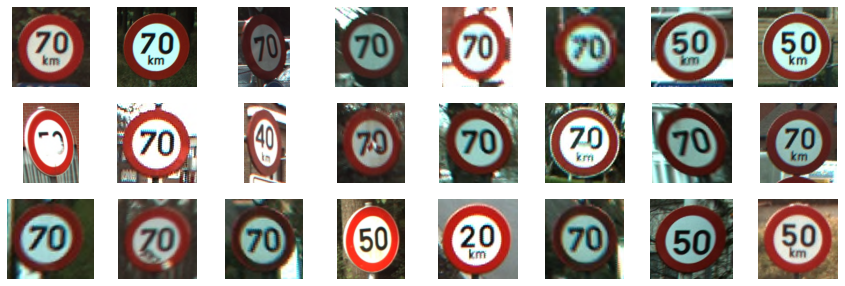

In [ ]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i) 
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(images, 32)

In [ ]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (79, 73, 3), min: 1, max: 255
shape: (111, 115, 3), min: 28, max: 255
shape: (320, 352, 3), min: 0, max: 255
shape: (83, 81, 3), min: 17, max: 198
shape: (97, 98, 3), min: 11, max: 255


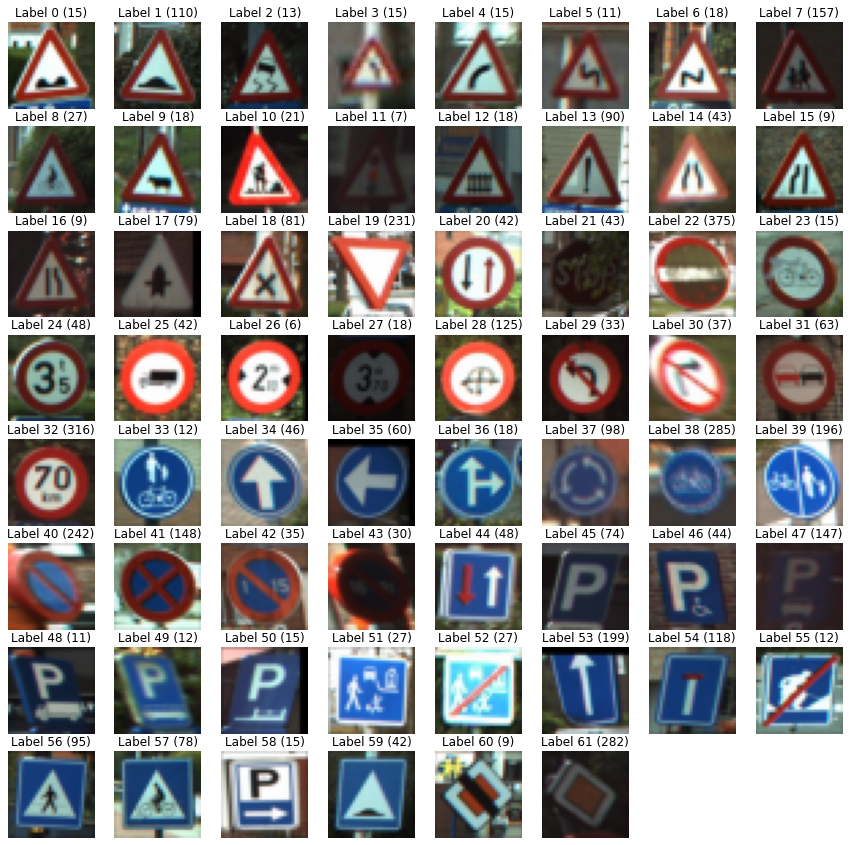

In [ ]:
# Resize images
images32 = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in images]
display_images_and_labels(images32, labels)

In [ ]:
for image in images32[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: 0.02498659620098039, max: 0.892198031556373
shape: (32, 32, 3), min: 0.1243259803921567, max: 0.9028214996936272
shape: (32, 32, 3), min: 0.0, max: 0.9803921568627453
shape: (32, 32, 3), min: 0.07450980392156863, max: 0.739486634497549
shape: (32, 32, 3), min: 0.1255572150735294, max: 0.9182349111519612


In [ ]:
labels_a = np.array(labels)
images_a = np.array(images32)
print("labels: ", labels_a.shape, "\nimages: ", images_a.shape)

labels:  (4575,) 
images:  (4575, 32, 32, 3)


In [ ]:
from numpy import array
graph = tf.Graph()
#####
# import tensorflow.compat.v1 as tf

# tf.disable_v2_behavior()
# x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
#######
with graph.as_default():
    images_ph = tf.placeholder(tf.float32, [None, 32, 32, 3])#1
    # images_ph = tf.compat.v1.placeholder(tf.float32, [None, 32, 32, 3])
    # images_ph = array(images_ph).reshape(1, 32, 32, 3)
    labels_ph = tf.placeholder(tf.int32, [None])#2
    # labels_ph = tf.compat.v1.placeholder(tf.int32, [None])
    # labels_ph = array(labels_ph).reshape(1)

    images_flat = tf.contrib.layers.flatten(images_ph)#3

    logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

    predicted_labels = tf.argmax(logits, 1)

    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels_ph))

    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

    init = tf.global_variables_initializer()

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", predicted_labels)

images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 3072), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.5


In [ ]:
# !pip install tensorflow==1.15.5

## Training

In [ ]:
session = tf.Session(graph=graph)

_ = session.run([init])

In [ ]:
for i in range(201):
    _, loss_value = session.run([train, loss], 
                                feed_dict={images_ph: images_a, labels_ph: labels_a})
    if i % 10 == 0:
        print("Loss: ", loss_value)

Loss:  4.2235794
Loss:  2.9013195
Loss:  2.411505
Loss:  2.1809006
Loss:  2.0411358
Loss:  1.9439796
Loss:  1.8711512
Loss:  1.8138471
Loss:  1.7669976
Loss:  1.7275634
Loss:  1.6936499
Loss:  1.664006
Loss:  1.637863
Loss:  1.6145947
Loss:  1.5937331
Loss:  1.5749085
Loss:  1.5578218
Loss:  1.5422312
Loss:  1.5279495
Loss:  1.5148182
Loss:  1.5026869


## Using the Model

The session object contains the values of all the variables in our model (i.e. the weights). 

In [ ]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# This Runs the "predicted_labels" op.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: sample_images})[0]
print(sample_labels)
print(predicted)

[38, 1, 38, 32, 19, 28, 22, 37, 19, 32]
[38  1 38 32  0 28 22 37 22 32]


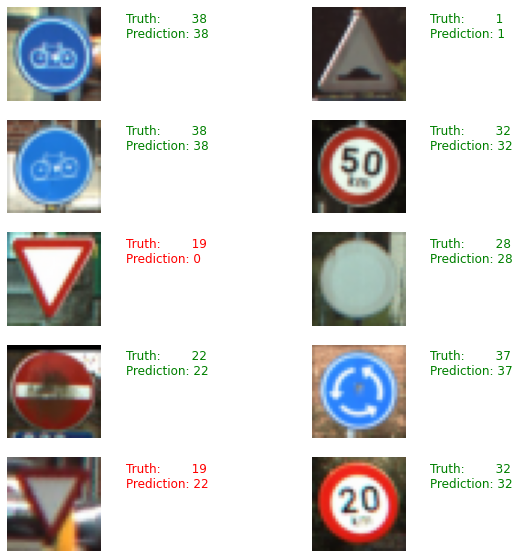

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])


In [ ]:
ROOT_PATH = "/content/"
train_data_dir = os.path.join(ROOT_PATH, "/content/Training")
test_data_dir = os.path.join(ROOT_PATH, "/content/Testing")

images, labels = load_data(test_data_dir)

In [ ]:
test_images, test_labels = load_data(test_data_dir)

In [ ]:
#r
# Run predictions against the full test set.
predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: test_images32})[0]
# Calculate how many matches we got.
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])
accuracy = match_count / len(test_labels)
print("Accuracy: {:.3f}".format(accuracy))

In [ ]:
#Trail

In [ ]:
import skimage.io
def load_data_test(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # directories = [d for d in os.listdir(data_dir) 
    #                if os.path.isdir(os.path.join(data_dir, d))]
    # # Loop through the label directories and collect the data in
    # # two lists, labels and images.
    # # labels = []
    # images = []
    # for d in directories:
    # label_dir = os.path.join(data_dir, d)
    # label_dir = os.path(d)
    file_names = [os.path.join(data_dir, f) 
                    for f in os.listdir(data_dir) if f.endswith(".ppm")]
    # For each label, load it's images and add them to the images list.
    # And add the label number (i.e. directory name) to the labels list.
    for f in file_names:
        # images.append(skimage.data.imread(f))
        images.append(skimage.io.imread(f))
        # labels.append(int(d))
    return images




---



In [ ]:
test_data_dir1 = "/content/test/ppmfiles"
# test_images, test_labels = load_data(test_data_dir)
test_images = load_data_test(test_data_dir1)

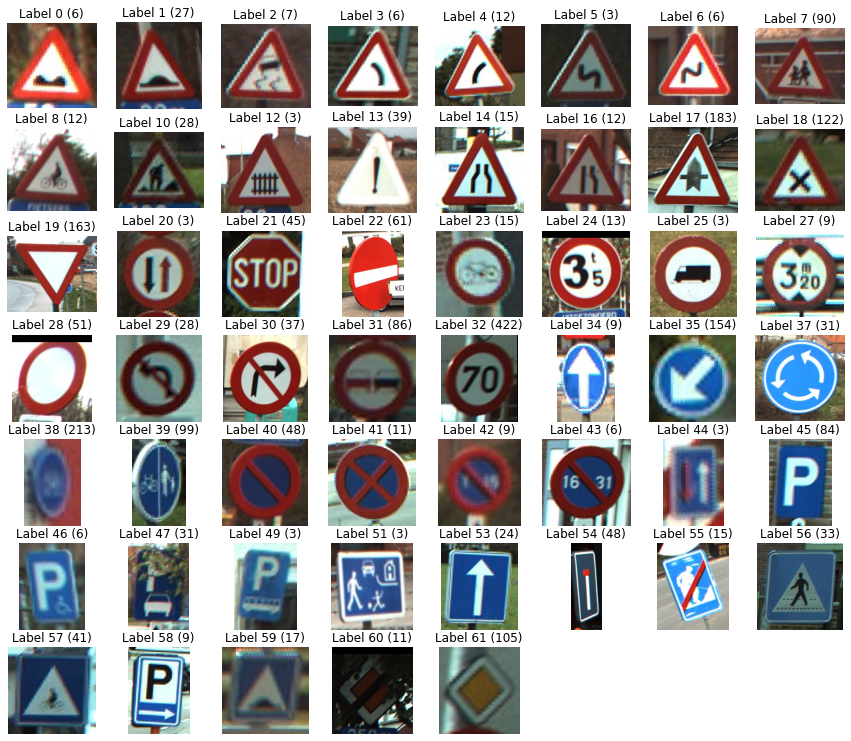

In [ ]:
def display_images_and_labels_test(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

In [ ]:
test_images32 = [skimage.transform.resize(image, (32, 32), mode='constant')
                 for image in test_images]
# display_images_and_labels(test_images32, test_labels)#r
# display_images_and_labels_test(test_images32)

fin_image = skimage.io.imread("/content/test/ppmfiles/1_all-signs.ppm")
# fin_image.reshape((32,32,3))
# image = array(fin_image).reshape(1,32,32,3)

In [ ]:

predicted = session.run([predicted_labels], 
                        feed_dict={images_ph: test_images32})[0]

# match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])
# accuracy = match_count / len(test_labels)
# print("Accuracy: {:.3f}".format(accuracy))

In [ ]:
for i in predicted:
    print(i)

7
7
7
7
56
7
56
7
18
7
13
7
56
37
37
32
32
32
28
32
32
32
32
32
32
32
32
32
28
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
28
32
32
38
38
39
39
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
37
38
38
38
39
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
39
38
38
38
38
38
38
38
38
38
38
38
38
38
39
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
28
38
38
38
38
39
38
39
38
38
38
38
38
39
38
38
38
38
38
38
38
38
38
38
38
38
39
38
38
38
38
38
32
38
38
38
28
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
39
38
38
38
38
38
38
38
38
38
38
38
38
38
39
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
61
37
61
61
61
7
61
61
61
61
61
13
1
1
22
61
13
18
13
22
18
61
18
22
22
22
13
22
13
1
18
1
22
1
13
1
22
13
13
54
53
54
7
13
32
13
13
13
13
13
13
13
13
13
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
32
32

In [ ]:
predicted1 = session.run([predicted_labels], 
                        feed_dict={images_ph: fin_image})[0]

ValueError: ignored

In [ ]:
# session.close()